In [123]:
# Basic tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Text Processing
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Statistics
from scipy.stats import ttest_ind

# EDA

In [2]:
df = pd.read_csv('news.csv')
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [13]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [59]:
df['text_length'] = df.text.apply(len)
df['title_length'] = df.title.apply(len)

Average text length of real news: 5292.16 words
Average text length of fake news: 4121.05 words
Pvalue: 0.0


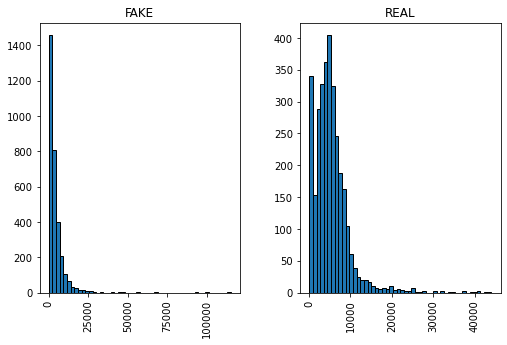

In [120]:
a = df.groupby('label')['text_length'].mean()
print(f'Average text length of real news: {round(a.REAL, 2)} words')
print(f'Average text length of fake news: {round(a.FAKE, 2)} words')

# P value
c = df[df.label == 'REAL']['text_length']
d = df[df.label == 'FAKE']['text_length']
statistic, pvalue = ttest_ind(c,d)
print(f'Pvalue: {round(pvalue, 5)}')

df.hist(column='text_length', by='label', figsize=(8,5), edgecolor='black', bins=50)
plt.show()


Average text length of real news: 61.38 words
Average text length of fake news: 69.18 words
Pvalue: 0.0


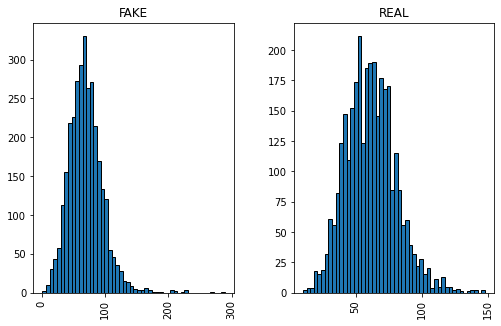

In [121]:
a = df.groupby('label')['title_length'].mean()
print(f'Average text length of real news: {round(a.REAL, 2)} words')
print(f'Average text length of fake news: {round(a.FAKE, 2)} words')

# P value
c = df[df.label == 'REAL']['title_length']
d = df[df.label == 'FAKE']['title_length']
statistic, pvalue = ttest_ind(c,d)
print(f'Pvalue: {round(pvalue, 5)}')

df.hist(column='title_length', by='label', figsize=(8,5), edgecolor='black', bins=50)
plt.show()


There are significant differences between the real news and fake news in terms of text length and title length

# Machine Learning

In [56]:
X = df.text
y = df.label

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Without TF-IDF and text-processing

In [32]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('model', PassiveAggressiveClassifier())
])

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('model', PassiveAggressiveClassifier())])

In [34]:
predictions = pipeline.predict(X_test)

In [36]:
print('No tf-idf technique')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

No text-processing technique
[[575  63]
 [ 47 582]]
              precision    recall  f1-score   support

        FAKE       0.92      0.90      0.91       638
        REAL       0.90      0.93      0.91       629

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



## With TF-IDF and wihtout text-processing

In [39]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', PassiveAggressiveClassifier())
])

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', PassiveAggressiveClassifier())])

In [41]:
predictions = pipeline.predict(X_test)

In [42]:
print('With tf-idf')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

With text-processing technique
[[585  53]
 [ 37 592]]
              precision    recall  f1-score   support

        FAKE       0.94      0.92      0.93       638
        REAL       0.92      0.94      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



## With both TF-IDF and text-processing

In [43]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [46]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('model', PassiveAggressiveClassifier())
])

In [47]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer',
                 CountVectorizer(analyzer=<function text_process at 0x0000010A9C5BA820>)),
                ('tfidf', TfidfTransformer()),
                ('model', PassiveAggressiveClassifier())])

In [49]:
predictions = pipeline.predict(X_test)

In [54]:
print('With text-processing technique')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
score = accuracy_score(y_test, predictions)
print(f'Accuracy: {round(score*100, 2)}%')

With text-processing technique
[[601  37]
 [ 31 598]]
              precision    recall  f1-score   support

        FAKE       0.95      0.94      0.95       638
        REAL       0.94      0.95      0.95       629

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267

Accuracy: 94.63%


The accuracy of our model is 94.63%. In the future, we might try to incorporate the title into the model. Since the length of the title is significantly differeny between the two classes, the new model might yield more accurate results